In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql

# Connect to the SQLite database
conn = sql.connect('movie.sqlite')

# Create a cursor
cursor = conn.cursor()

# Execute a SQL query to retrieve table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all table names
table_names = cursor.fetchall()

# Print the table names
print("Tables in the database:")
for table in table_names:
    print(table[0])

Tables in the database:
IMDB
earning
genre


In [2]:
# Execute a SQL query to retrieve table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all table names
table_names = cursor.fetchall()

# Print the table names and their columns
print("Tables and columns in the database:")
for table in table_names:
    table_name = table[0]
    print(f"\nTable: {table_name}")
    
    # Execute PRAGMA command to retrieve column information
    cursor.execute(f"PRAGMA table_info({table_name});")
    
    # Fetch all column information
    columns = cursor.fetchall()
    
    # Print the column names
    for column in columns:
        column_name = column[1]
        print(column_name)

Tables and columns in the database:

Table: IMDB
Movie_id
Title
Rating
TotalVotes
MetaCritic
Budget
Runtime
CVotes10
CVotes09
CVotes08
CVotes07
CVotes06
CVotes05
CVotes04
CVotes03
CVotes02
CVotes01
CVotesMale
CVotesFemale
CVotesU18
CVotesU18M
CVotesU18F
CVotes1829
CVotes1829M
CVotes1829F
CVotes3044
CVotes3044M
CVotes3044F
CVotes45A
CVotes45AM
CVotes45AF
CVotes1000
CVotesUS
CVotesnUS
VotesM
VotesF
VotesU18
VotesU18M
VotesU18F
Votes1829
Votes1829M
Votes1829F
Votes3044
Votes3044M
Votes3044F
Votes45A
Votes45AM
Votes45AF
VotesIMDB
Votes1000
VotesUS
VotesnUS

Table: earning
Movie_id
Domestic
Worldwide

Table: genre
Movie_id
genre


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql

# Connect to the SQLite database
conn = sql.connect('movie.sqlite')

# Read data directly into a pandas DataFrame
query = """
SELECT Title, CVotesMale, CVotesFemale, CVotesU18M, CVotesU18F, CVotes45AM, CVotes45AF
FROM IMDB
"""
df_votes = pd.read_sql_query(query, conn)

df_votes.head()


,Title,CVotesMale,CVotesFemale,CVotesU18M,CVotesU18F,CVotes45AM,CVotes45AF
0,12 Years a Slave (2013),313823,82012,1363,457,23072,5726
1,127 Hours (2010),212866,44600,567,170,12400,2261
2,50/50 (2011),188925,58348,348,153,9912,2681
3,About Time (2013),126718,58098,325,321,10690,3026
4,Amour (2012),49808,16719,95,24,5803,1490


In [4]:
df_votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         117 non-null    object
 1   CVotesMale    117 non-null    object
 2   CVotesFemale  117 non-null    object
 3   CVotesU18M    117 non-null    object
 4   CVotesU18F    117 non-null    object
 5   CVotes45AM    117 non-null    object
 6   CVotes45AF    117 non-null    object
dtypes: object(7)
memory usage: 6.5+ KB


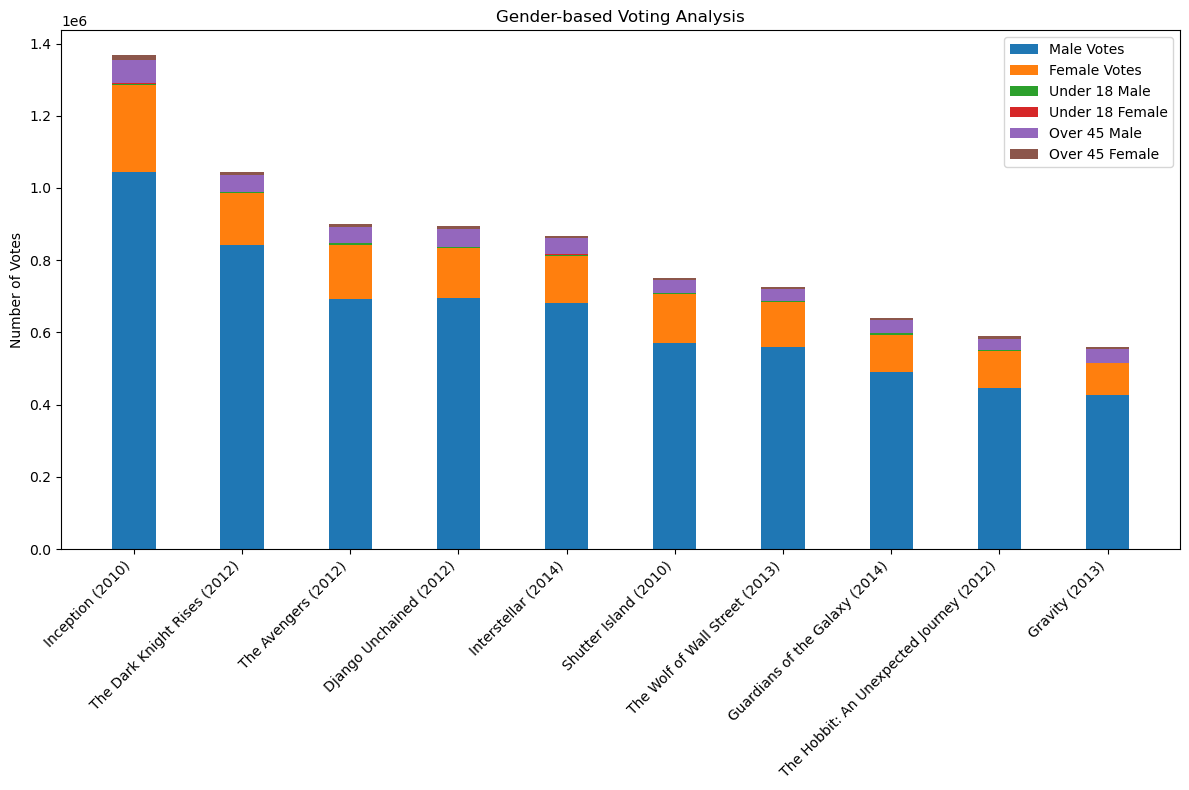

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql

# Connect to the SQLite database
conn = sql.connect('movie.sqlite')

# Read data directly into a pandas DataFrame
query = """
SELECT Title, CVotesMale, CVotesFemale, CVotesU18M, CVotesU18F, CVotes45AM, CVotes45AF 
FROM IMDB
"""
df_votes = pd.read_sql_query(query, conn)

# Convert vote columns to numeric
vote_columns = ['CVotesMale', 'CVotesFemale', 'CVotesU18M', 'CVotesU18F', 'CVotes45AM', 'CVotes45AF']
df_votes[vote_columns] = df_votes[vote_columns].apply(pd.to_numeric)

# Select top 10 movies based on total votes
df_votes['TotalVotes'] = df_votes[vote_columns].sum(axis=1)
df_top10 = df_votes.nlargest(10, 'TotalVotes')

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.4
x = np.arange(len(df_top10))

ax.bar(x, df_top10['CVotesMale'], width=bar_width, label='Male Votes')
ax.bar(x, df_top10['CVotesFemale'], width=bar_width, bottom=df_top10['CVotesMale'], label='Female Votes')
ax.bar(x, df_top10['CVotesU18M'], width=bar_width, bottom=df_top10['CVotesMale']+df_top10['CVotesFemale'], label='Under 18 Male')
ax.bar(x, df_top10['CVotesU18F'], width=bar_width, bottom=df_top10['CVotesMale']+df_top10['CVotesFemale']+df_top10['CVotesU18M'], label='Under 18 Female')
ax.bar(x, df_top10['CVotes45AM'], width=bar_width, bottom=df_top10['CVotesMale']+df_top10['CVotesFemale']+df_top10['CVotesU18M']+df_top10['CVotesU18F'], label='Over 45 Male')
ax.bar(x, df_top10['CVotes45AF'], width=bar_width, bottom=df_top10['CVotesMale']+df_top10['CVotesFemale']+df_top10['CVotesU18M']+df_top10['CVotesU18F']+df_top10['CVotes45AM'], label='Over 45 Female')

ax.set_xticks(x)
ax.set_xticklabels(df_top10['Title'], rotation=45, ha='right')
ax.set_ylabel('Number of Votes')
ax.set_title('Gender-based Voting Analysis')
ax.legend()

plt.tight_layout()
plt.show()

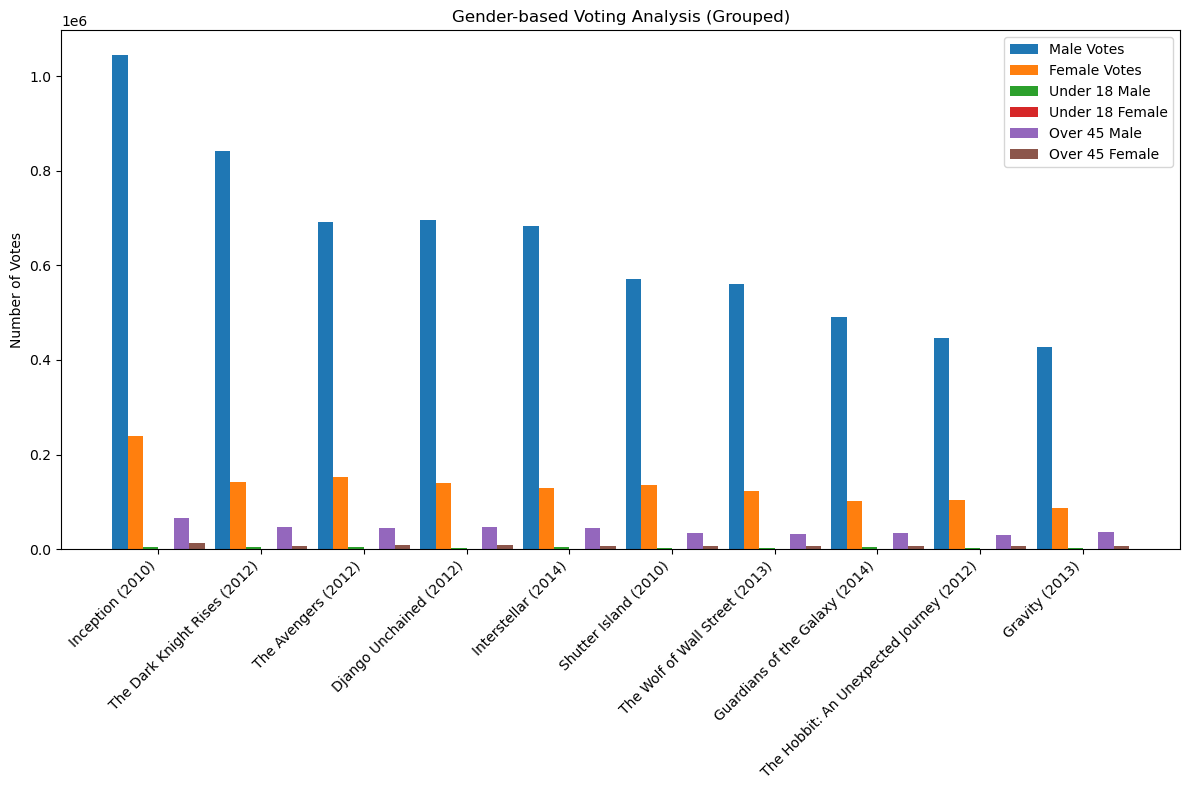

In [6]:
# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.15
x = np.arange(len(df_top10))

ax.bar(x - 2.5*bar_width, df_top10['CVotesMale'], width=bar_width, label='Male Votes')
ax.bar(x - 1.5*bar_width, df_top10['CVotesFemale'], width=bar_width, label='Female Votes')
ax.bar(x - 0.5*bar_width, df_top10['CVotesU18M'], width=bar_width, label='Under 18 Male')
ax.bar(x + 0.5*bar_width, df_top10['CVotesU18F'], width=bar_width, label='Under 18 Female')
ax.bar(x + 1.5*bar_width, df_top10['CVotes45AM'], width=bar_width, label='Over 45 Male')
ax.bar(x + 2.5*bar_width, df_top10['CVotes45AF'], width=bar_width, label='Over 45 Female')

ax.set_xticks(x)
ax.set_xticklabels(df_top10['Title'], rotation=45, ha='right')
ax.set_ylabel('Number of Votes')
ax.set_title('Gender-based Voting Analysis (Grouped)')
ax.legend()

plt.tight_layout()
plt.show()

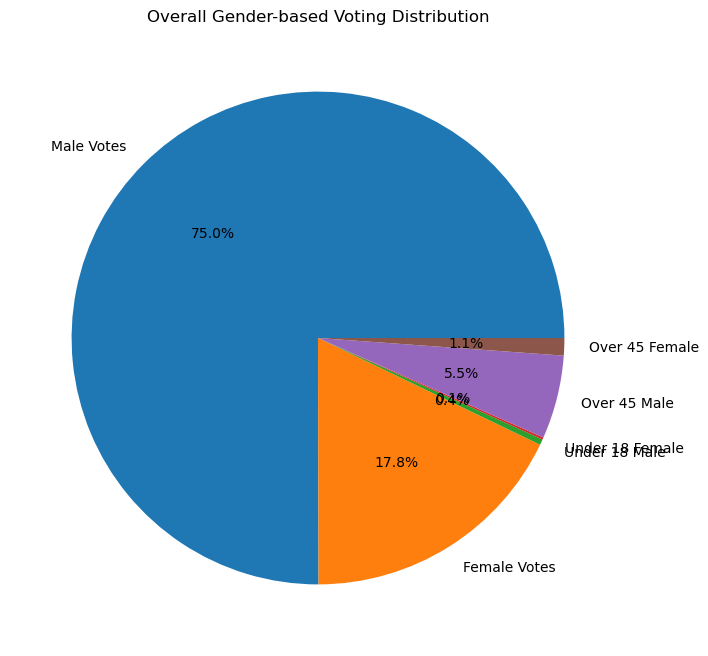

In [7]:
# Calculate total votes for each gender category
total_male = df_votes['CVotesMale'].sum()
total_female = df_votes['CVotesFemale'].sum()
total_u18m = df_votes['CVotesU18M'].sum()
total_u18f = df_votes['CVotesU18F'].sum()
total_45am = df_votes['CVotes45AM'].sum()
total_45af = df_votes['CVotes45AF'].sum()

# Create a pie chart
labels = ['Male Votes', 'Female Votes', 'Under 18 Male', 'Under 18 Female', 'Over 45 Male', 'Over 45 Female']
sizes = [total_male, total_female, total_u18m, total_u18f, total_45am, total_45af]

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_title('Overall Gender-based Voting Distribution')

plt.show()

C:\Users\ayesh\AppData\Local\Temp\ipykernel_22784\500691100.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_votes['Title'], rotation=45, ha='right')
C:\Users\ayesh\AppData\Local\Temp\ipykernel_22784\500691100.py:24: UserWarning: Glyph 61891 (\uf1c3) missing from current font.
  plt.tight_layout()
c:\Users\ayesh\anaconda6\envs\dev\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 61891 (\uf1c3) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


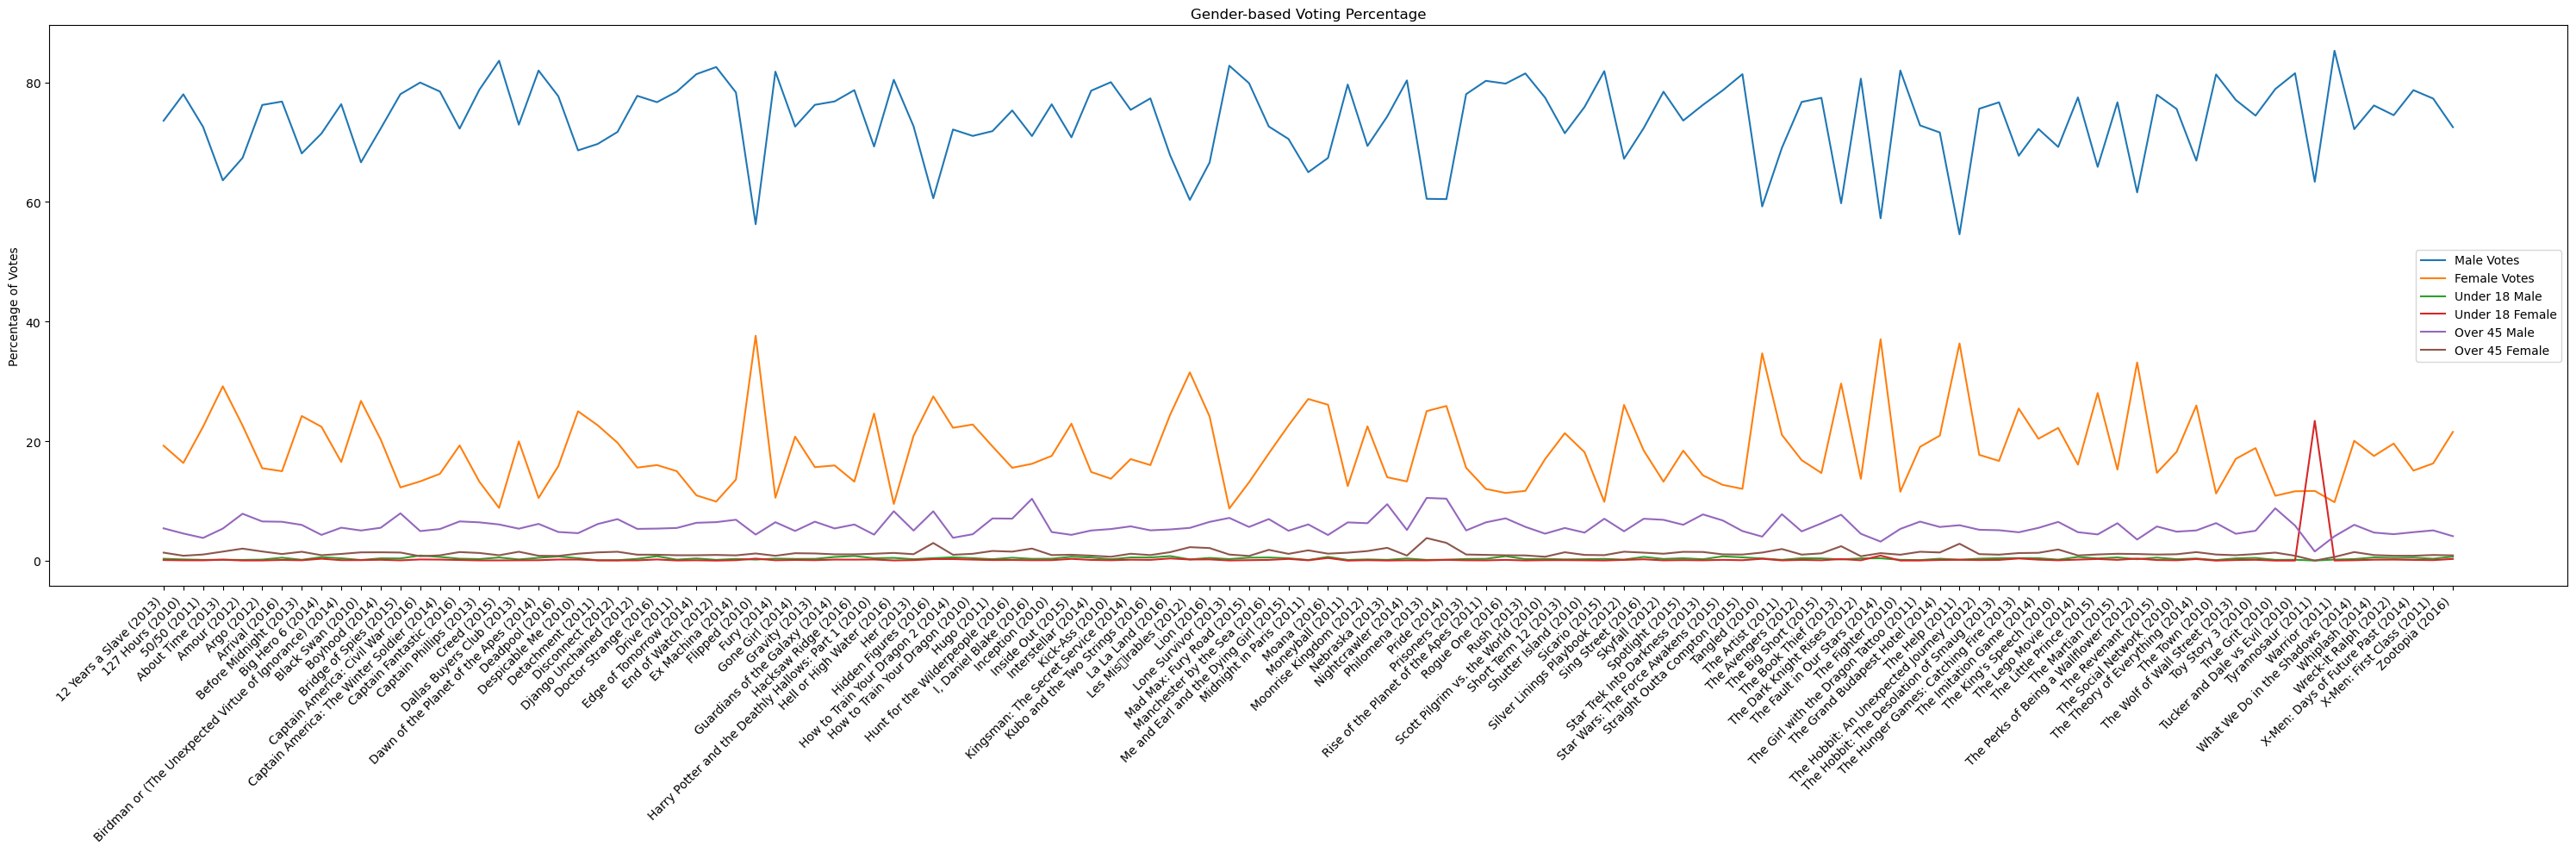

In [8]:
# Calculate percentage of votes for each gender category
df_votes['Male%'] = df_votes['CVotesMale'] / df_votes['TotalVotes'] * 100
df_votes['Female%'] = df_votes['CVotesFemale'] / df_votes['TotalVotes'] * 100
df_votes['Under18M%'] = df_votes['CVotesU18M'] / df_votes['TotalVotes'] * 100
df_votes['Under18F%'] = df_votes['CVotesU18F'] / df_votes['TotalVotes'] * 100
df_votes['Over45M%'] = df_votes['CVotes45AM'] / df_votes['TotalVotes'] * 100
df_votes['Over45F%'] = df_votes['CVotes45AF'] / df_votes['TotalVotes'] * 100

# Create a line chart
fig, ax = plt.subplots(figsize=(30, 10))

ax.plot(df_votes['Title'], df_votes['Male%'], label='Male Votes')
ax.plot(df_votes['Title'], df_votes['Female%'], label='Female Votes')
ax.plot(df_votes['Title'], df_votes['Under18M%'], label='Under 18 Male')
ax.plot(df_votes['Title'], df_votes['Under18F%'], label='Under 18 Female')
ax.plot(df_votes['Title'], df_votes['Over45M%'], label='Over 45 Male')
ax.plot(df_votes['Title'], df_votes['Over45F%'], label='Over 45 Female')

ax.set_xticklabels(df_votes['Title'], rotation=45, ha='right')
ax.set_ylabel('Percentage of Votes')
ax.set_title('Gender-based Voting Percentage')
ax.legend()

plt.tight_layout()
plt.show()

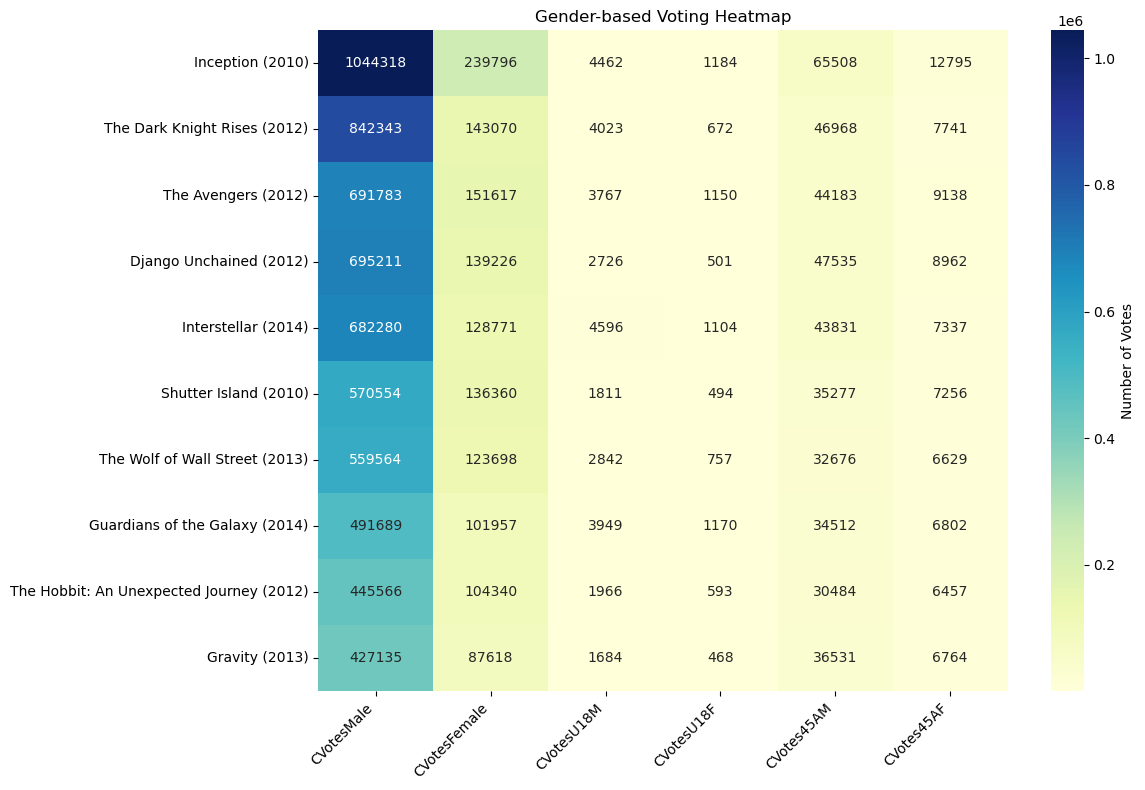

In [9]:
# Create a heatmap
fig, ax = plt.subplots(figsize=(12, 8))

vote_columns = ['CVotesMale', 'CVotesFemale', 'CVotesU18M', 'CVotesU18F', 'CVotes45AM', 'CVotes45AF']
heatmap_data = df_top10[vote_columns]

sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Number of Votes'})

ax.set_xticklabels(vote_columns, rotation=45, ha='right')
ax.set_yticklabels(df_top10['Title'], rotation=0)
ax.set_title('Gender-based Voting Heatmap')

plt.tight_layout()
plt.show()